In [1]:
import numpy as np
from dcase2020_task2.data_sets.mcm_dataset import MCMDataSet, TRAINING_ID_MAP, INVERSE_CLASS_MAP
import matplotlib.pyplot as plt
import librosa

Loading training data set for machine type fan id 0...
Loading validation data set for machine type fan id 0...
Loading training data set for machine type fan id 2...
Loading validation data set for machine type fan id 2...
Loading training data set for machine type fan id 4...
Loading validation data set for machine type fan id 4...
Loading training data set for machine type fan id 6...
Loading validation data set for machine type fan id 6...
Loading training data set for machine type pump id 0...
Loading validation data set for machine type pump id 0...
Loading training data set for machine type pump id 2...
Loading validation data set for machine type pump id 2...
Loading training data set for machine type pump id 4...
Loading validation data set for machine type pump id 4...
Loading training data set for machine type pump id 6...
Loading validation data set for machine type pump id 6...
Loading training data set for machine type slider id 0...
Loading validation data set for machin

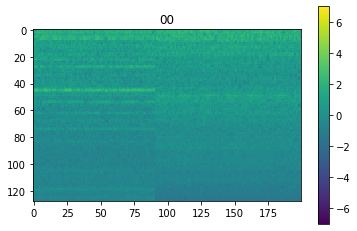

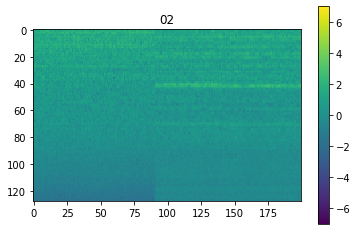

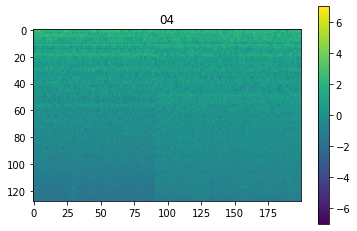

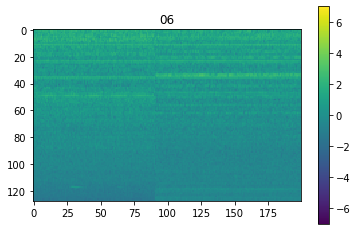

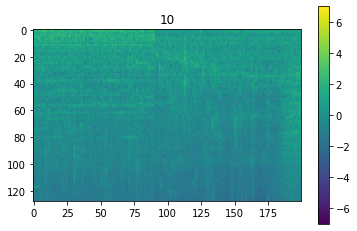

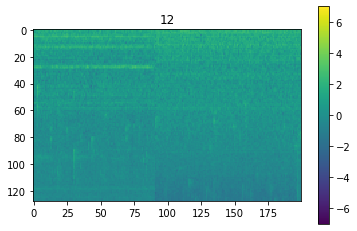

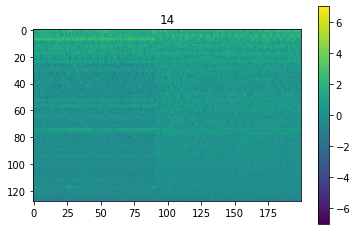

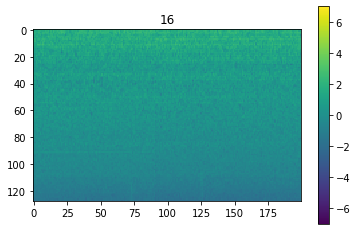

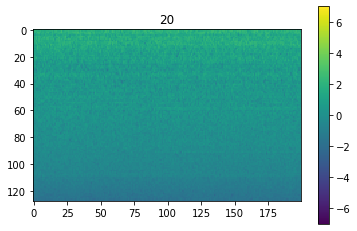

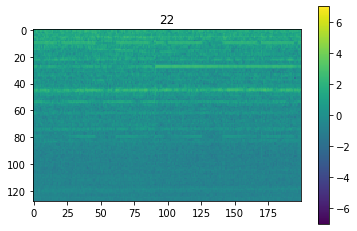

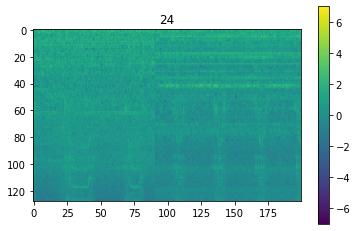

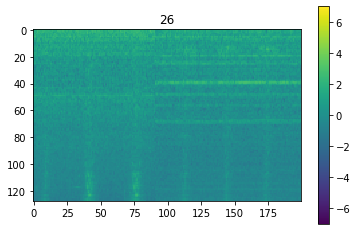

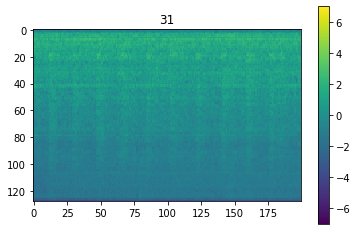

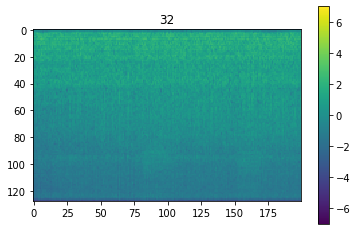

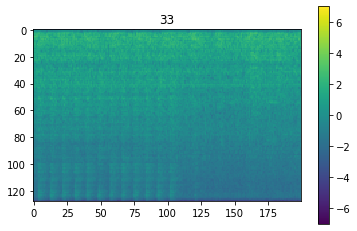

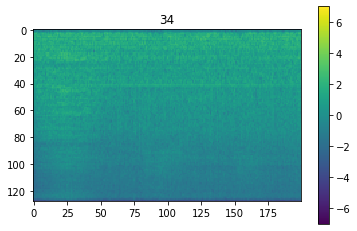

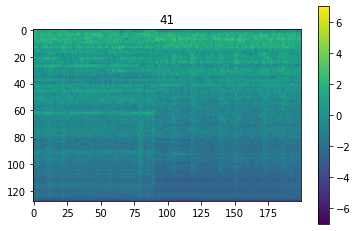

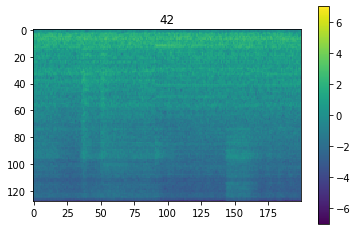

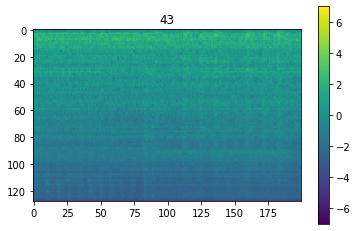

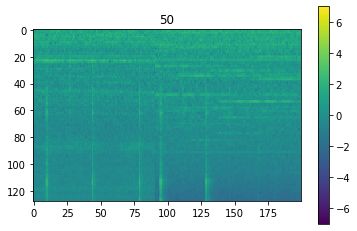

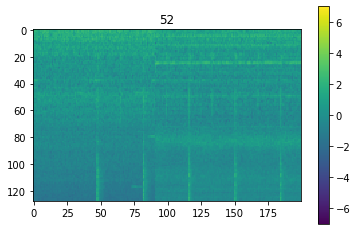

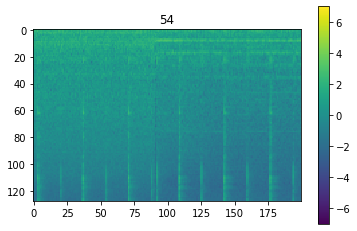

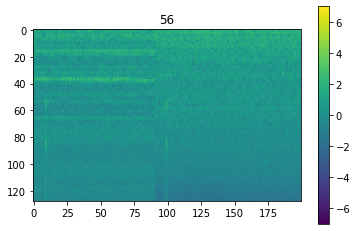

In [3]:
global_data_set = MCMDataSet(
    normalize='all', 
    normalize_raw=True
)

for i in [0, 1, 2, 3, 4, 5]:
    print("\n===MACHINE: {}===".format(INVERSE_CLASS_MAP[i]))
    for j in TRAINING_ID_MAP[i]:
        data = global_data_set.data_sets[i][j][0].data
        print(" {} {}: {} {} {} {}".format(i, j, data.mean(), data.std(), data.min(), data.max()))

            
        sample = data[:, 2100:2300]
  
        plt.title("{}{}".format(i, j))
        plt.imshow(sample, vmin=-7, vmax=7)
        plt.colorbar()
        plt.show()
        

In [6]:
for i in [0, 1, 2, 3, 4, 5]:
    print("\n===MACHINE: {}===".format(INVERSE_CLASS_MAP[i]))
    for j in TRAINING_ID_MAP[i]:
        data = global_data_set.data_sets[i][j][0].data
        print(" {} {}: {} {} {} {}".format(i, j, data.mean(), data.std(), data.min(), data.max()))


===MACHINE: fan===
 0 0: -21.82453155517578 4.6620917320251465 -40.611148834228516 -2.827712059020996
 0 2: -20.822473526000977 4.324833393096924 -40.04936981201172 -3.2460169792175293
 0 4: -21.30634880065918 4.544234275817871 -39.505706787109375 -0.5141990780830383
 0 6: -21.44223976135254 4.635149955749512 -38.367523193359375 -0.25037986040115356

===MACHINE: pump===
 1 0: -21.155197143554688 4.118587017059326 -38.46428680419922 -3.3396902084350586
 1 2: -21.19675064086914 4.232976913452148 -36.10765075683594 -2.0073726177215576
 1 4: -20.63302230834961 3.5693395137786865 -37.83955001831055 -2.937912702560425
 1 6: -21.85927391052246 4.798905849456787 -40.927642822265625 -1.5486621856689453

===MACHINE: slider===
 2 0: -22.01165008544922 4.650505542755127 -40.96961975097656 -1.5449295043945312
 2 2: -21.887033462524414 4.661956787109375 -41.64686584472656 -0.5526613593101501
 2 4: -21.340457916259766 4.303439617156982 -38.54829025268555 -0.7617202401161194
 2 6: -21.443885803222656

In [4]:
toy = []
real = []

for i in [0, 1, 2, 3, 4, 5]:
    for j in TRAINING_ID_MAP[i]:
        data = global_data_set.data_sets[i][j][0].data
        if i == 3 or i == 4:
            toy.append(data)
        else:
            real.append(data)       

toy = np.concatenate(toy, axis=1)
real = np.concatenate(real, axis=1)

for i in [0, 1, 2, 3, 4, 5]:
    print("\n===MACHINE: {}===".format(INVERSE_CLASS_MAP[i]))
    for j in TRAINING_ID_MAP[i]:
        data = global_data_set.data_sets[i][j][0].data

        if i == 3 or i == 4:
            mean = toy.mean(axis=1, keepdims=True)
            std = toy.std(axis=1, keepdims=True)
        else:
            mean = real.mean(axis=1, keepdims=True)
            std = real.std(axis=1, keepdims=True) 
        
        data = (data - mean) / std
        print(" {} {}: {} {} {} {}".format(
            i, 
            j, 
            data.mean(), 
            data.std(), 
            data.min(), 
            data.max())
        )      


===MACHINE: fan===
 0 0: -0.08933787792921066 0.9703465104103088 -7.03611421585083 7.895759105682373
 0 2: 0.24096326529979706 0.850817859172821 -8.102295875549316 7.172799110412598
 0 4: 0.08105944097042084 0.9050031304359436 -7.591675281524658 6.824311256408691
 0 6: 0.002873427467420697 0.9396154880523682 -8.113207817077637 7.144719123840332

===MACHINE: pump===
 1 0: 0.19303379952907562 0.8918400406837463 -8.048925399780273 7.288379192352295
 1 2: 0.12292482703924179 0.918567955493927 -7.378749370574951 7.12493896484375
 1 4: 0.319163978099823 0.9467781782150269 -8.268993377685547 7.871455192565918
 1 6: -0.1221403256058693 0.9975405931472778 -7.0991692543029785 6.254748344421387

===MACHINE: slider===
 2 0: -0.08462555706501007 1.0019686222076416 -8.254349708557129 6.724973201751709
 2 2: -0.1524689793586731 1.0043723583221436 -7.395613193511963 8.133195877075195
 2 4: 0.056053463369607925 1.0970830917358398 -6.717521667480469 7.6771416664123535
 2 6: -0.0023164446465671062 1.061

In [5]:
data = []

for i in [0, 1, 2, 3, 4, 5]:
    for j in TRAINING_ID_MAP[i]:
        data_ = global_data_set.data_sets[i][j][0].data
        data.append(data_)

data = np.concatenate(data, axis=1)
mean = data.mean(axis=1, keepdims=True)
std = data.std(axis=1, keepdims=True)

for i in [0, 1, 2, 3, 4, 5]:
    print("\n===MACHINE: {}===".format(INVERSE_CLASS_MAP[i]))
    for j in TRAINING_ID_MAP[i]:
        data = global_data_set.data_sets[i][j][0].data  
        data = (data - mean) / std
        
        print(" {} {}: {} {} {} {}".format(
            i, 
            j, 
            data.mean(), 
            data.std(), 
            data.min(), 
            data.max())
        )


===MACHINE: fan===
 0 0: 0.16999195516109467 0.8738657832145691 -6.981350898742676 7.087948322296143
 0 2: 0.45946958661079407 0.785319447517395 -7.565849304199219 6.05511999130249
 0 4: 0.32552725076675415 0.8085528612136841 -7.57932710647583 7.160754680633545
 0 6: 0.25878703594207764 0.8608725070953369 -8.077392578125 7.078117370605469

===MACHINE: pump===
 1 0: 0.403493732213974 0.843977689743042 -8.015641212463379 6.592822074890137
 1 2: 0.3422306478023529 0.8674562573432922 -7.0853753089904785 6.345381736755371
 1 4: 0.48828622698783875 0.9470726847648621 -8.227043151855469 7.098057746887207
 1 6: 0.15157166123390198 0.8722658753395081 -6.692295074462891 6.214192867279053

===MACHINE: slider===
 2 0: 0.17408789694309235 0.9025779366493225 -8.165599822998047 6.018310070037842
 2 2: 0.1127338707447052 0.9098665118217468 -7.377525329589844 7.32260799407959
 2 4: 0.2681368589401245 1.0088813304901123 -6.906660079956055 6.683195114135742
 2 6: 0.22863569855690002 0.9702684879302979 -

In [ ]:
other = []
car = []
conveyor = []

for i in [0, 1, 2, 3, 4, 5]:
    for j in TRAINING_ID_MAP[i]:
        data = global_data_set.data_sets[i][j][0].data
        if i == 3:
            car.append(data)
        if i == 4:
            conveyor.append(data)
        else:
            other.append(data)       

other = np.concatenate(other, axis=1)
car = np.concatenate(car, axis=1)
conveyor = np.concatenate(conveyor, axis=1)

for i in [0, 1, 2, 3, 4, 5]:
    for j in TRAINING_ID_MAP[i]:
        data = global_data_set.data_sets[i][j][0].data
        # print(conveyor.shape)
        if i == 3:
            mean = car.mean(axis=1, keepdims=True)
            std = car.std(axis=1, keepdims=True)
        if i == 4:
            mean = conveyor.mean(axis=1, keepdims=True)
            std = conveyor.std(axis=1, keepdims=True)
        else:
            mean = other.mean(axis=1, keepdims=True)
            std = other.std(axis=1, keepdims=True) 
            
            
        sample = (data[:, 2100:2300] - mean) / std
        
        # print((data - mean) / std)
        print("{} {}".format(((data - mean) / std).mean(), ((data - mean) / std).std()))
        
        plt.title("{}{}".format(i, j))
        plt.imshow(sample, vmin=-7, vmax=7)
        plt.colorbar()
        plt.show()